In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
!pip install nltk

In [3]:
!pip install scikit-learn


In [4]:
!pip install --upgrade pip setuptools wheel


In [5]:
import nltk
import matplotlib.pyplot as plt
from collections import Counter
import string
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
# Function to load Bangla text from a file
def load_human_written_text(file_path):
    with open('/content/Jadukor-Humayun Ahmed.txt', 'r', encoding='utf-8') as file:
        return file.read()

# Path to the text file
file_path = '/content/Jadukor-Humayun Ahmed.txt'

# Load the text from the file and store it in the 'text' variable
human_written_text = load_human_written_text(file_path)

# Print the text to verify
print(human_written_text)

আজ হাফ ইয়ারলি পরীক্ষার অংক খাতা দিয়েছে।

বাবলু পেয়েছে সাড়ে আট। শুধু তাই নয়, খাতার উপর লাল পেনসিল দিয়ে ধীরেন স্যার
বড় বড় করে লিখে দিয়েছেন, গবু। কী সর্বনাশ!

বাবলু খাতা উল্টে রাখল। যাতে গবু লেখাটা কারো চোখে না পড়ে। কিন্তু ধীরেন স্যার
মেঘস্বরে বললেন, এই, বেঞ্চির উপর উঠে দাঁড়া।

বাবুল বেঞ্চির উপর উঠে দাঁড়াল। তোর অংক খাতায় কী লিখে দিয়েছি সবাইকে দেখা।

সে মুখ কালো করে সবাইকে দেখাল খাতাটা। ফাস্ট বেঞ্চে বসা কয়েকজন ভ্যাকভ্যাক

করে হেসে ফেলল। ধীরেন স্যার গর্জন করে উঠলেন। গ্যাই, কে হাসে! মুখ সেলাই করে
দেব।

হাসি বন্ধ হয়ে গেল সঙ্গে সঙ্গে। ধীরেন স্যারকে সবাই যমের মতো ভয় করে। আড়ালে
ডাকে যম স্যার। ফার্স্ট বেঞ্চে আবার একটু খিকখিক শব্দ হল। ধীরেন স্যার হুংকার দিয়ে
উঠলেন। আরেকবার হাসির শব্দ শুনলে চড় দিয়ে দাঁত খুলে ফেলব। নাট্যশালা নাকি?
এ?

ক্লাস পুরোপুরি নিঃশব্দ হয়ে গেল। ধীরেন স্যার থমথমে গলায় বললেন, এ্াই বাবলু, তুই
ঘণ্টা না পড়া পর্যন্ত বেঞ্চির উপর দাঁড়িয়ে থাকবি।


বাবলু উদাস চোখে জানালা দিয়ে বাইরে তাকিয়ে রইল। বেঞ্ির উপর এক ঘণ্টা দাঁড়িয়ে
থাকা তেমন কিছু না। কিন্তু বাসায় ফিরে

In [7]:
def bangla_sentence_tokenize(human_written_text):
    # Split sentences by full stop (।) used in Bangla
    sentences = human_written_text.split('।')
    sentences = human_written_text.split('\n\n')
    sentences = human_written_text.split('\n')
    return [sentence.strip() for sentence in sentences if sentence.strip()]

In [8]:
def bangla_word_tokenize(human_written_text):
    # Split words by spaces
    words = human_written_text.split()

    # Remove any leading/trailing whitespace and filter out empty strings
    words = [word.strip() for word in words if word.strip()]

    # Print the total number of words
    total_words = len(words)
    print(f"Total number of words: {total_words}")

    return words, total_words  # Also returning the total number of words


In [9]:
def preprocess_text(human_written_text):
    # Remove punctuation (you might want to keep Bangla-specific punctuation like "।")
    translator = str.maketrans('', '', string.punctuation)
    human_written_text = human_written_text.translate(translator)

    # Tokenize sentences using the custom function
    sentences = bangla_sentence_tokenize(human_written_text)

    # Tokenize words using the custom function
    words, total_words = bangla_word_tokenize(human_written_text) # Modified to correctly capture the two return values

    return words, total_words, sentences # Added total_words to the return statement


words, total_words, sentences = preprocess_text(human_written_text)
print(words)
print(total_words)
print(sentences)

Total number of words: 1586
['আজ', 'হাফ', 'ইয়ারলি', 'পরীক্ষার', 'অংক', 'খাতা', 'দিয়েছে।', 'বাবলু', 'পেয়েছে', 'সাড়ে', 'আট।', 'শুধু', 'তাই', 'নয়', 'খাতার', 'উপর', 'লাল', 'পেনসিল', 'দিয়ে', 'ধীরেন', 'স্যার', 'বড়', 'বড়', 'করে', 'লিখে', 'দিয়েছেন', 'গবু।', 'কী', 'সর্বনাশ', 'বাবলু', 'খাতা', 'উল্টে', 'রাখল।', 'যাতে', 'গবু', 'লেখাটা', 'কারো', 'চোখে', 'না', 'পড়ে।', 'কিন্তু', 'ধীরেন', 'স্যার', 'মেঘস্বরে', 'বললেন', 'এই', 'বেঞ্চির', 'উপর', 'উঠে', 'দাঁড়া।', 'বাবুল', 'বেঞ্চির', 'উপর', 'উঠে', 'দাঁড়াল।', 'তোর', 'অংক', 'খাতায়', 'কী', 'লিখে', 'দিয়েছি', 'সবাইকে', 'দেখা।', 'সে', 'মুখ', 'কালো', 'করে', 'সবাইকে', 'দেখাল', 'খাতাটা।', 'ফাস্ট', 'বেঞ্চে', 'বসা', 'কয়েকজন', 'ভ্যাকভ্যাক', 'করে', 'হেসে', 'ফেলল।', 'ধীরেন', 'স্যার', 'গর্জন', 'করে', 'উঠলেন।', 'গ্যাই', 'কে', 'হাসে', 'মুখ', 'সেলাই', 'করে', 'দেব।', 'হাসি', 'বন্ধ', 'হয়ে', 'গেল', 'সঙ্গে', 'সঙ্গে।', 'ধীরেন', 'স্যারকে', 'সবাই', 'যমের', 'মতো', 'ভয়', 'করে।', 'আড়ালে', 'ডাকে', 'যম', 'স্যার।', 'ফার্স্ট', 'বেঞ্চে', 'আবার', 'একটু', 'খিকখিক', 'শব্দ', 

In [10]:
# Function to load Bangla text from a file
def load_human_written_text(file_path):
    with open('/content/Jadukor-Humayun Ahmed.txt', 'r', encoding='utf-8') as file:
        return file.read()

# Path to the text file
file_path = '/content/Jadukor-Humayun Ahmed.txt'

# Load the text from the file and store it in the 'text' variable
human_written_text = load_human_written_text(file_path)

# Print the text to verify
print(human_written_text)

আজ হাফ ইয়ারলি পরীক্ষার অংক খাতা দিয়েছে।

বাবলু পেয়েছে সাড়ে আট। শুধু তাই নয়, খাতার উপর লাল পেনসিল দিয়ে ধীরেন স্যার
বড় বড় করে লিখে দিয়েছেন, গবু। কী সর্বনাশ!

বাবলু খাতা উল্টে রাখল। যাতে গবু লেখাটা কারো চোখে না পড়ে। কিন্তু ধীরেন স্যার
মেঘস্বরে বললেন, এই, বেঞ্চির উপর উঠে দাঁড়া।

বাবুল বেঞ্চির উপর উঠে দাঁড়াল। তোর অংক খাতায় কী লিখে দিয়েছি সবাইকে দেখা।

সে মুখ কালো করে সবাইকে দেখাল খাতাটা। ফাস্ট বেঞ্চে বসা কয়েকজন ভ্যাকভ্যাক

করে হেসে ফেলল। ধীরেন স্যার গর্জন করে উঠলেন। গ্যাই, কে হাসে! মুখ সেলাই করে
দেব।

হাসি বন্ধ হয়ে গেল সঙ্গে সঙ্গে। ধীরেন স্যারকে সবাই যমের মতো ভয় করে। আড়ালে
ডাকে যম স্যার। ফার্স্ট বেঞ্চে আবার একটু খিকখিক শব্দ হল। ধীরেন স্যার হুংকার দিয়ে
উঠলেন। আরেকবার হাসির শব্দ শুনলে চড় দিয়ে দাঁত খুলে ফেলব। নাট্যশালা নাকি?
এ?

ক্লাস পুরোপুরি নিঃশব্দ হয়ে গেল। ধীরেন স্যার থমথমে গলায় বললেন, এ্াই বাবলু, তুই
ঘণ্টা না পড়া পর্যন্ত বেঞ্চির উপর দাঁড়িয়ে থাকবি।


বাবলু উদাস চোখে জানালা দিয়ে বাইরে তাকিয়ে রইল। বেঞ্ির উপর এক ঘণ্টা দাঁড়িয়ে
থাকা তেমন কিছু না। কিন্তু বাসায় ফিরে

In [11]:
!pip install BnLemma

In [12]:
import BnLemma as lm
import string

# Define a list of Bangla stop words (you can extend this list as needed)
bangla_stop_words = ['এ', 'ও', 'আছে', 'থেকে', 'কিন্তু', 'যা', 'যে', 'এবং', 'এই', 'ওই', 'হয়', 'সে', 'আমি', 'আমরা', 'তুমি', 'তারা']

# Function to tokenize and lemmatize Bangla sentences
def bangla_sentence_tokenize(human_written_text):
    # Initialize the BnLemma lemmatizer
    bl = lm.Lemmatizer()

    # Split sentences by full stop (।) and newline characters
    sentences = human_written_text.split('।')
    sentences = [sentence for sublist in [s.split('\n\n') for s in sentences] for sentence in sublist]
    sentences = [sentence for sublist in [s.split('\n') for s in sentences] for sentence in sublist]

    # Strip and filter empty sentences
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

    # Lemmatize each sentence, avoiding empty or problematic sentences
    lemmatized_sentences = []
    for sentence in sentences:
        if sentence:  # Ensure sentence is not empty
            try:
                lemmatized_sentence = bl.lemma(sentence)
                lemmatized_sentences.append(lemmatized_sentence)
            except KeyError as e:
                print(f"Error lemmatizing sentence: {sentence}, skipping. Error: {e}")

    # Return the list of lemmatized sentences
    return lemmatized_sentences

# Function to remove stop words and count words
def remove_stop_words(sentences):
    # Lists to hold sentences after stop word removal
    cleaned_sentences = []

    # Initialize counters
    total_words = 0
    remaining_words = 0
    total_removed_words = 0

    # Total number of sentences
    total_sentences = len(sentences)

    # Iterate over each sentence
    for sentence in sentences:
        # Tokenize the sentence into words
        words = sentence.split()

        # Count the total number of words
        total_words += len(words)

        # Remove stop words from the sentence
        filtered_words = [word for word in words if word not in bangla_stop_words]

        # Count the number of removed stop words
        removed_words_count = len(words) - len(filtered_words)
        total_removed_words += removed_words_count

        # Count the number of remaining words after removing stop words
        remaining_words += len(filtered_words)

        # Join the words back into a cleaned sentence
        cleaned_sentence = ' '.join(filtered_words)

        # Add the cleaned sentence to the list
        cleaned_sentences.append(cleaned_sentence)

    # Print the cleaned sentences
    print("Cleaned Sentences:", cleaned_sentences)

    # Print total and remaining word counts
    print(f"Total words: {total_words}")
    print(f"Remaining words after stop word removal: {remaining_words}")
    print(f"Total stop words removed: {total_removed_words}")
    print(f"Total sentences: {total_sentences}")

    return cleaned_sentences

# Preprocessing function to remove punctuation and lemmatize
def preprocess_text(human_written_text):
    # Remove punctuation (you might want to adjust for Bangla-specific punctuation)
    translator = str.maketrans('', '', string.punctuation)
    human_written_text = human_written_text.translate(translator)

    # Tokenize and lemmatize sentences using the custom function
    sentences = bangla_sentence_tokenize(human_written_text)

    return sentences


# Preprocess the text
sentences = preprocess_text(human_written_text)
# Remove stop words from the sentences and print results
cleaned_sentences = remove_stop_words(sentences)


Error lemmatizing sentence: রাগী গলায় বললেন এই বয়সে বদরামি, skipping. Error: ''
Cleaned Sentences: ['আজ হাফ ইয়ারলি পরীক্ষা অংক খাতা দিয়েছে', 'বাবলা পেয়েছে সাড়ে আট', 'শুধু তাই নয় খাতা উপর লাল পেনসিল দেওয়া ধীর যার', 'বড় বড় করা লিখে দিয়েছেন গবু', 'কী সর্বনাশ', 'বাবলা খাতা উল্টে খল', 'যাতা গবু লেখাপড়া কারো চোখ না পড়ে', 'ধীর যার', 'স্বর লেন বেঞ্চ উপর উঠে দাঁড়া', 'বাবু বেঞ্চ উপর উঠে দাঁড়া', 'আপনার অংক খাতা কী লিখে দিয়েছি সবাই দেখা', 'মুখ কালো করা সবাই দেখা খাতা', 'ফাস্ট বেঞ্চ বসা কয়েকজন ভ্যাকসিন', 'করা ফেল', 'ধীর যার গর্জন করা লেন', 'গ্যাঁট কে হাস মুখ সেলাই করা', 'দেব', 'হাসি বন্ধ হ গেল সঙ্গে সঙ্গে', 'ধীর স্যার সবাই যম মত ভয় করা', 'আড়ালে', 'ডাক যম যার', 'ফার্স্ট বেঞ্চ আবার একটু খিকখিক শব্দ হওয়া', 'ধীর যার হুংকার দেওয়া', 'লেন', 'আরেক হাসি শব্দ শুনা চড় দেওয়া দাঁত খোলা ফেল', 'নাট্য নাকি', '', 'ক্লাস পুরো নিঃশব্দ হ গেল', 'ধীর যার থমথম গলা লেন বাবলা আপনি', 'ঘণ্টা না পড়া পর্যন্ত বেঞ্চ উপর দাঁড়ি থাক', 'বাবলা দাস চোখ জানাজা দেওয়া বাই তাক রইল', 'বেঞ্ির উপর এক ঘণ্টা দাঁড়ি', 'থাকা 

In [13]:
from itertools import combinations

# Function to create word pairs from a cleaned sentence
def create_word_pairs(cleaned_sentences):
    for sentence in cleaned_sentences:
        words = sentence.split()  # Tokenize the cleaned sentence into words

        # Generate pairs of words
        word_pairs = list(combinations(words, 2))  # Create pairs using combinations

        # Print the pairs and the count of pairs
        print(f"Sentence: '{sentence}'")
        print(f"Word Pairs: {word_pairs}")
        print(f"Number of pairs: {len(word_pairs)}\n")


create_word_pairs(cleaned_sentences)


Sentence: 'আজ হাফ ইয়ারলি পরীক্ষা অংক খাতা দিয়েছে'
Word Pairs: [('আজ', 'হাফ'), ('আজ', 'ইয়ারলি'), ('আজ', 'পরীক্ষা'), ('আজ', 'অংক'), ('আজ', 'খাতা'), ('আজ', 'দিয়েছে'), ('হাফ', 'ইয়ারলি'), ('হাফ', 'পরীক্ষা'), ('হাফ', 'অংক'), ('হাফ', 'খাতা'), ('হাফ', 'দিয়েছে'), ('ইয়ারলি', 'পরীক্ষা'), ('ইয়ারলি', 'অংক'), ('ইয়ারলি', 'খাতা'), ('ইয়ারলি', 'দিয়েছে'), ('পরীক্ষা', 'অংক'), ('পরীক্ষা', 'খাতা'), ('পরীক্ষা', 'দিয়েছে'), ('অংক', 'খাতা'), ('অংক', 'দিয়েছে'), ('খাতা', 'দিয়েছে')]
Number of pairs: 21

Sentence: 'বাবলা পেয়েছে সাড়ে আট'
Word Pairs: [('বাবলা', 'পেয়েছে'), ('বাবলা', 'সাড়ে'), ('বাবলা', 'আট'), ('পেয়েছে', 'সাড়ে'), ('পেয়েছে', 'আট'), ('সাড়ে', 'আট')]
Number of pairs: 6

Sentence: 'শুধু তাই নয় খাতা উপর লাল পেনসিল দেওয়া ধীর যার'
Word Pairs: [('শুধু', 'তাই'), ('শুধু', 'নয়'), ('শুধু', 'খাতা'), ('শুধু', 'উপর'), ('শুধু', 'লাল'), ('শুধু', 'পেনসিল'), ('শুধু', 'দেওয়া'), ('শুধু', 'ধীর'), ('শুধু', 'যার'), ('তাই', 'নয়'), ('তাই', 'খাতা'), ('তাই', 'উপর'), ('তাই', 'লাল'), ('তাই', 'পেনসিল'), ('তাই'

In [14]:
from collections import defaultdict
from itertools import combinations

# Function to check frequency of word pairs from cleaned sentences
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)  # Create a default dictionary to count pairs

    for sentence in cleaned_sentences:
        words = sentence.split()  # Tokenize the cleaned sentence into words
        word_pairs = combinations(words, 2)  # Create pairs using combinations

        # Count each pair's frequency
        for pair in word_pairs:
            pair_frequency[pair] += 1

    # Print the frequency of each pair if frequency > 1
    print("Pairs with Frequency > 1:")
    for pair, frequency in pair_frequency.items():
        if frequency > 1:  # Only print if frequency is greater than 1
            print(f"Pair: {pair}, Frequency: {frequency}")

check_pair_frequency(cleaned_sentences)  # Call the function



Pairs with Frequency > 1:
Pair: ('অংক', 'খাতা'), Frequency: 2
Pair: ('বাবলা', 'সাড়ে'), Frequency: 2
Pair: ('বাবলা', 'আট'), Frequency: 2
Pair: ('সাড়ে', 'আট'), Frequency: 3
Pair: ('খাতা', 'উপর'), Frequency: 4
Pair: ('খাতা', 'দেওয়া'), Frequency: 2
Pair: ('ধীর', 'যার'), Frequency: 8
Pair: ('বড়', 'বড়'), Frequency: 2
Pair: ('বড়', 'করা'), Frequency: 4
Pair: ('বড়', 'লিখে'), Frequency: 2
Pair: ('বড়', 'দিয়েছেন'), Frequency: 2
Pair: ('বড়', 'গবু'), Frequency: 2
Pair: ('বাবলা', 'খাতা'), Frequency: 2
Pair: ('স্বর', 'লেন'), Frequency: 2
Pair: ('বেঞ্চ', 'উপর'), Frequency: 3
Pair: ('বেঞ্চ', 'উঠে'), Frequency: 2
Pair: ('বেঞ্চ', 'দাঁড়া'), Frequency: 2
Pair: ('উপর', 'উঠে'), Frequency: 2
Pair: ('উপর', 'দাঁড়া'), Frequency: 2
Pair: ('উঠে', 'দাঁড়া'), Frequency: 2
Pair: ('আপনার', 'কী'), Frequency: 3
Pair: ('অংক', 'কী'), Frequency: 2
Pair: ('সবাই', 'দেখা'), Frequency: 2
Pair: ('মুখ', 'কালো'), Frequency: 4
Pair: ('মুখ', 'করা'), Frequency: 6
Pair: ('কালো', 'করা'), Frequency: 5
Pair: ('করা', 'দেখা'), F

In [15]:
pip install networkx matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2437 (\N{BENGALI LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2434 (\N{BENGALI SIGN ANUSVARA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2454 (\N{BENGALI LETTER KHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pyla

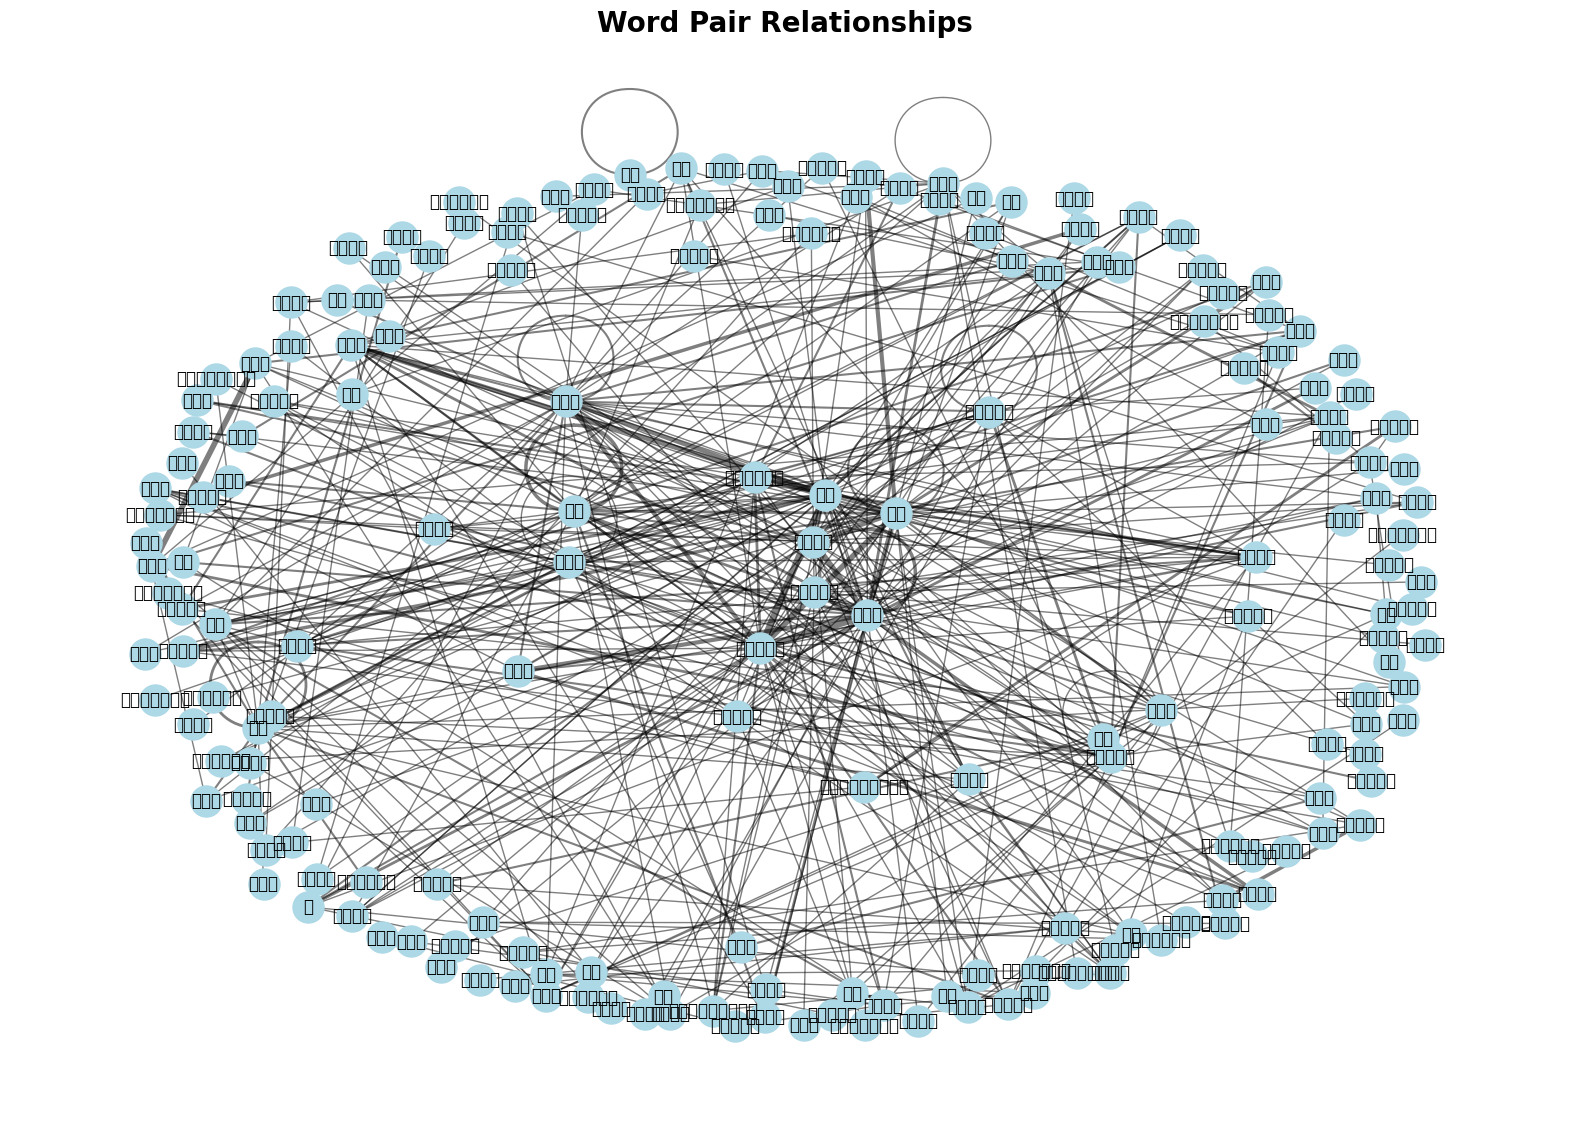

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations

# Function to check frequency of word pairs from cleaned sentences
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)  # Create a default dictionary to count pairs

    for sentence in cleaned_sentences:
        words = sentence.split()  # Tokenize the cleaned sentence into words
        word_pairs = combinations(words, 2)  # Create pairs using combinations

        # Count each pair's frequency
        for pair in word_pairs:
            pair_frequency[pair] += 1

    return pair_frequency  # Return the pair frequency dictionary

# Function to plot word pairs with Bangla labels
def plot_word_pairs(pair_frequency):
    G = nx.Graph()  # Create a new graph

    for pair, frequency in pair_frequency.items():
        if frequency > 1:  # Only consider pairs with frequency greater than 1
            G.add_edge(pair[0], pair[1], weight=frequency)  # Add edge with weight

    # Generate positions for the nodes using a layout that separates them more
    pos = nx.spring_layout(G, k=2)  # Increase 'k' for more spacing

    weights = nx.get_edge_attributes(G, 'weight').values()  # Get edge weights

    plt.figure(figsize=(20, 14))

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

    # Draw edges with thickness based on weight
    nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.5)

    # Use a Bangla-compatible font for labels
    plt.rcParams['font.family'] = 'Noto Sans Bengali'  # Set a Bangla font
    nx.draw_networkx_labels(G, pos, font_size=12)

    plt.title('Word Pair Relationships', fontdict={'fontsize': 20, 'fontweight': 'bold'})
    plt.axis('off')  # Turn off the axis
    plt.show()  # Display the graph

# Get the frequency of pairs
pair_frequency = check_pair_frequency(cleaned_sentences)

# Plot the word pairs with Bangla labels
plot_word_pairs(pair_frequency)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer()

# Fit and transform the cleaned sentences
tfidf_matrix = vectorizer.fit_transform(cleaned_sentences)

# Create a DataFrame to view the results
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Save TF-IDF values to 'tfidf_each_word.txt'
with open('tfidf_each_word.txt', 'w', encoding='utf-8') as file:
    for word, tfidf_value in zip(vectorizer.get_feature_names_out(), tfidf_matrix.toarray().sum(axis=0)):
        file.write(f'{word}: {tfidf_value}\n')

# Display the TF-IDF DataFrame
print(tfidf_df)


      অত   অদ   অন  অবশ  অবস   অভ   অস  আওয়   আক   আগ  ...        সর  সরক  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.719922  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...  ...   
288  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.0   
289  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.0   
290  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.0   
291  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.0   
292  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.0   

      সশ  সহজ  হইয  হওয়   হল   হস   ৎস  ২৬৯  
0    0.0  0.0  0.0  0.0  0.0 

# PER WORD TFIDF COUNT. WORDS ARE NODES AND THE WORDS THAT HAVE SAME TFIDF HAVE EDGE BETWEEN THEM


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2437 (\N{BENGALI LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2468 (\N{BENGALI LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2470 (\N{BENGALI LETTER DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtool

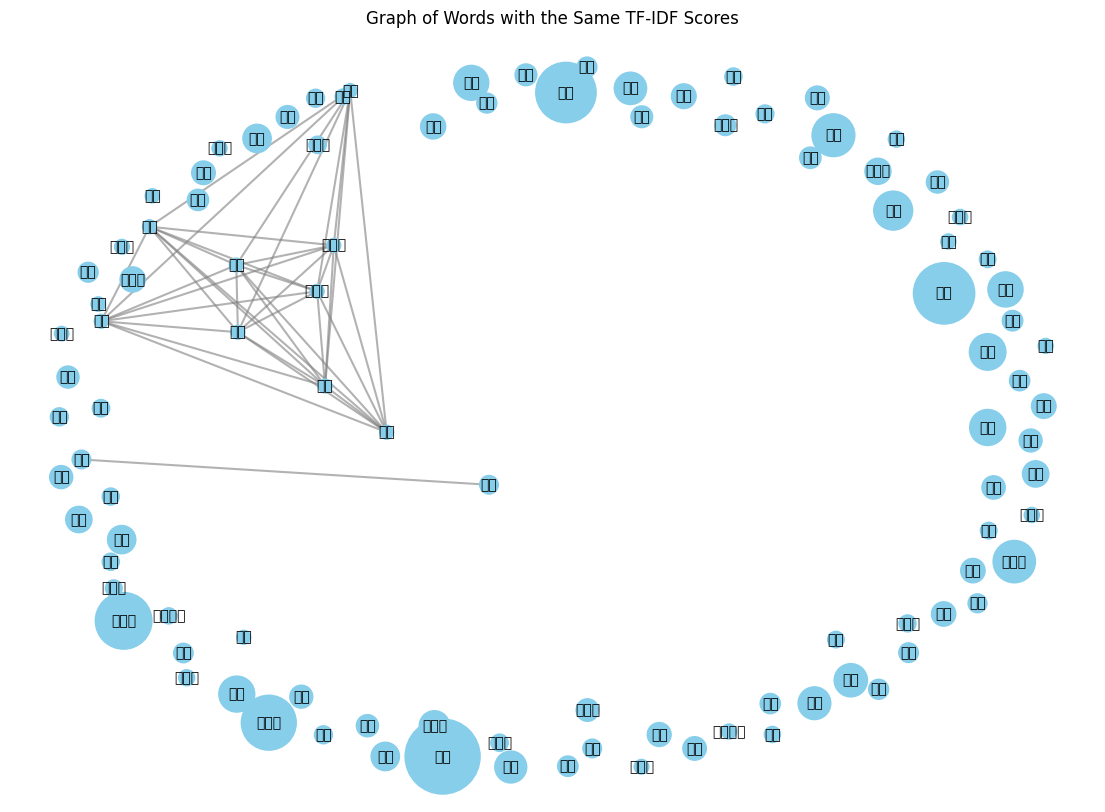

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_words_graph_with_same_tfidf(tfidf_df, threshold=1):
    # Sum the TF-IDF values for each word across all sentences
    word_tfidf_sum = tfidf_df.sum(axis=0)

    # Filter words that have a TF-IDF score greater than or equal to the threshold
    high_tfidf_words = word_tfidf_sum[word_tfidf_sum >= threshold]

    # Group words by TF-IDF scores
    tfidf_to_words = {}
    for word, score in high_tfidf_words.items():
        if score not in tfidf_to_words:
            tfidf_to_words[score] = []
        tfidf_to_words[score].append(word)

    # Initialize the graph
    G = nx.Graph()

    # Add nodes and edges based on TF-IDF score grouping
    for score, words in tfidf_to_words.items():
        # Add each word as a node
        for word in words:
            G.add_node(word, size=score * 100)  # Size can be proportional to the score for visualization

        # Create edges between words with the same TF-IDF score
        if len(words) > 1:
            for i in range(len(words)):
                for j in range(i + 1, len(words)):
                    G.add_edge(words[i], words[j], weight=score)

    # Generate positions for the nodes using a layout
    pos = nx.spring_layout(G, k=1)  # Adjust 'k' for node spacing

    # Draw nodes, edges, and labels
    plt.figure(figsize=(14, 10))
    nx.draw_networkx_nodes(G, pos, node_size=[G.nodes[node]['size'] for node in G.nodes], node_color='skyblue')
    nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

    plt.title('Graph of Words with the Same TF-IDF Scores')
    plt.axis('off')
    plt.show()

# Use the function to plot words with TF-IDF >= 1 and edges between words with the same TF-IDF
plot_words_graph_with_same_tfidf(tfidf_df, threshold=1)


In [19]:
import numpy as np

def calculate_word_pair_tfidf(tfidf_df, pair_frequency, filename='word_pair_tfidf.txt'):
    # Create a dictionary to store the TF-IDF scores for each word
    word_tfidf_scores = tfidf_df.sum(axis=0).to_dict()

    # Dictionary to store TF-IDF scores for word pairs
    word_pair_tfidf = {}

    # Calculate TF-IDF for word pairs with frequency greater than 1
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            word1, word2 = pair
            tfidf1 = word_tfidf_scores.get(word1, 0)
            tfidf2 = word_tfidf_scores.get(word2, 0)

            # Calculate average TF-IDF for the pair
            pair_tfidf = (tfidf1 + tfidf2) / 2
            word_pair_tfidf[pair] = pair_tfidf

    # Write word pairs with TF-IDF scores to a file
    with open(filename, 'w', encoding='utf-8') as file:
        file.write("Word Pair\tFrequency\tTF-IDF\n")
        for pair, tfidf_score in sorted(word_pair_tfidf.items(), key=lambda x: x[1], reverse=True):
            word1, word2 = pair
            freq = pair_frequency[pair]
            file.write(f"{word1} - {word2}\t{freq}\t{tfidf_score:.4f}\n")

    print(f"Word pairs with their TF-IDF scores have been saved to {filename}.")

# Example usage:
# Assuming `tfidf_df` contains the TF-IDF matrix from your previous calculations
# and `pair_frequency` is the result of `check_pair_frequency(cleaned_sentences)`
calculate_word_pair_tfidf(tfidf_df, pair_frequency, filename='word_pair_tfidf.txt')



Word pairs with their TF-IDF scores have been saved to word_pair_tfidf.txt.


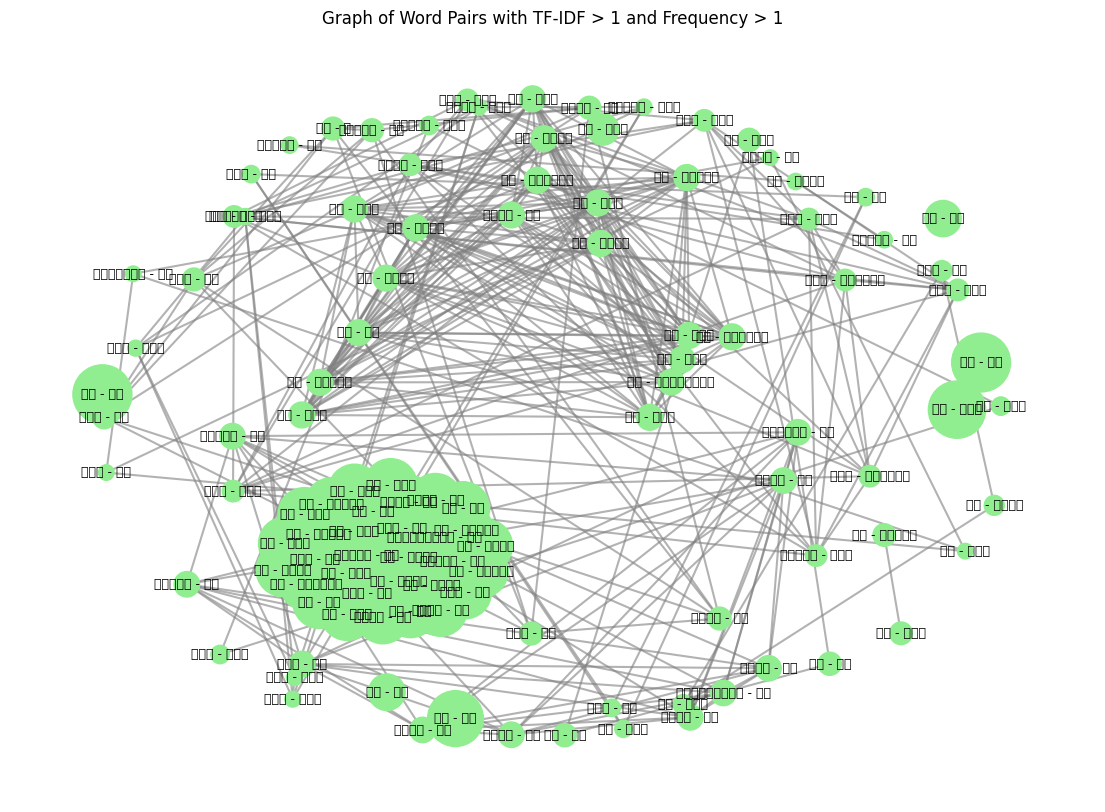

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to plot word pairs as nodes and create edges based on same TF-IDF scores
def plot_word_pair_graph_with_same_tfidf(filename='word_pair_tfidf.txt'):
    # Read the word pair TF-IDF data from the file
    word_pair_tfidf = {}
    try:
        with open(filename, 'r', encoding='utf-8') as file:
            next(file)  # Skip the header
            for line in file:
                parts = line.strip().split('\t')
                if len(parts) == 3:
                    word_pair = parts[0].strip()
                    tfidf_score = float(parts[2].strip())
                    frequency = int(parts[1].strip())  # Assume frequency is in the second column
                    # Store only if frequency > 1 and tfidf_score > 1
                    if frequency > 1 and tfidf_score > 1:
                        word_pair_tfidf[word_pair] = tfidf_score
    except FileNotFoundError:
        print(f"Error: The file '{filename}' was not found.")
        return
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
        return

    # Group word pairs by their TF-IDF scores
    tfidf_to_word_pairs = defaultdict(list)
    for word_pair, tfidf_score in word_pair_tfidf.items():
        tfidf_to_word_pairs[tfidf_score].append(word_pair)

    # Initialize the graph
    G = nx.Graph()

    # Add nodes and edges based on TF-IDF score grouping
    for tfidf_score, word_pairs in tfidf_to_word_pairs.items():
        # Add each word pair as a node
        for word_pair in word_pairs:
            G.add_node(word_pair, size=tfidf_score * 100)  # Size can be proportional to the TF-IDF score

        # Create edges between word pairs with the same TF-IDF score
        if len(word_pairs) > 1:
            for i in range(len(word_pairs)):
                for j in range(i + 1, len(word_pairs)):
                    G.add_edge(word_pairs[i], word_pairs[j], weight=tfidf_score)

    # Check if the graph is empty
    if len(G.nodes) == 0:
        print("No word pairs with frequency greater than 1 and TF-IDF greater than 1 were found.")
        return

    # Generate positions for the nodes using a layout
    pos = nx.spring_layout(G, k=2)  # Adjust 'k' for node spacing

    # Draw nodes, edges, and labels
    plt.figure(figsize=(14, 10))
    nx.draw_networkx_nodes(G, pos, node_size=[G.nodes[node]['size'] for node in G.nodes], node_color='lightgreen')
    nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=9, font_family='sans-serif')

    plt.title('Graph of Word Pairs with TF-IDF > 1 and Frequency > 1')
    plt.axis('off')
    plt.show()

# Load and plot the graph
plot_word_pair_graph_with_same_tfidf(filename='word_pair_tfidf.txt')


In [30]:
from gensim.models import Word2Vec

def generate_word2vec(cleaned_sentences, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Initialize and train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Retrieve the word vectors (word2vec representation)
    word_vectors = model.wv

    # Save word vectors to a file
    with open('word2vec_human.txt', 'w') as f:
        for word in word_vectors.index_to_key:
            f.write(f"{word}: {word_vectors[word].tolist()}\n")

    print(f"Word2Vec representations have been saved to word2vec_human.txt")
    return word_vectors


word_vectors = generate_word2vec(cleaned_sentences)


Word2Vec representations have been saved to word2vec_human.txt


In [31]:
!pip install gensim matplotlib scikit-learn


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pyla

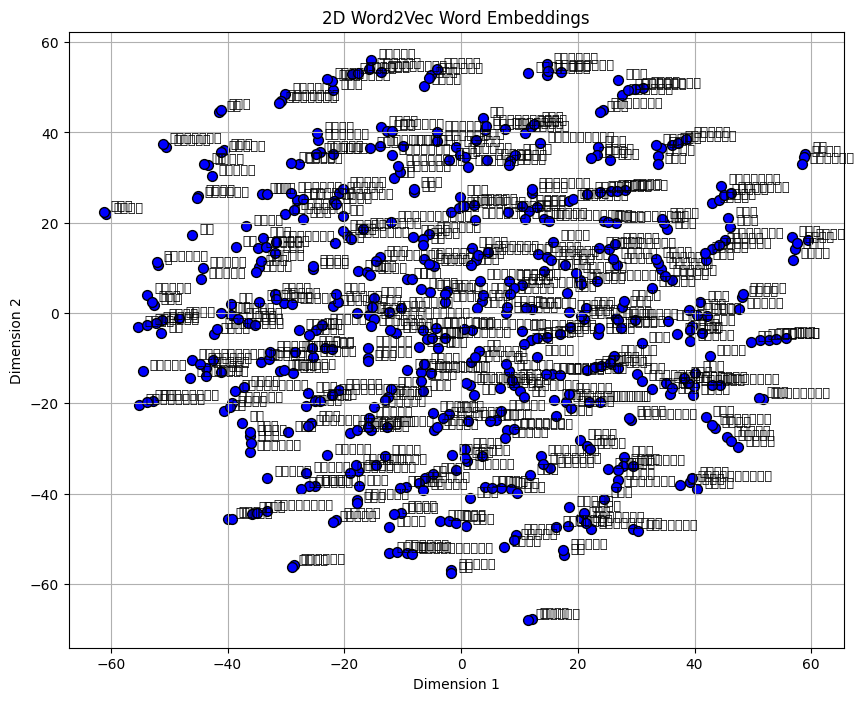

In [32]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import numpy as np

def plot_word2vec(cleaned_sentences, vector_size=100, window=5, min_count=1, perplexity=5):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Get the word vectors and corresponding words
    word_vectors = model.wv
    words = word_vectors.index_to_key
    vectors = np.array([word_vectors[word] for word in words])

    # Reduce the dimensionality to 2D using t-SNE with adjusted perplexity
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(perplexity, len(words) - 1))  # Make sure perplexity < n_samples
    vectors_2d = tsne.fit_transform(vectors)

    # Plot the words in the 2D space
    plt.figure(figsize=(10, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='o', c='blue', edgecolor='k', s=50)

    # Annotate each word at its position
    for i, word in enumerate(words):
        plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(5, 2), textcoords='offset points', fontsize=9)

    # Display the plot
    plt.title('2D Word2Vec Word Embeddings')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.grid(True)
    plt.show()


plot_word2vec(cleaned_sentences)


#Plot the words as nodes and the cosine similarity between them as edge



Word2Vec representations have been saved to word2vec_human.txt


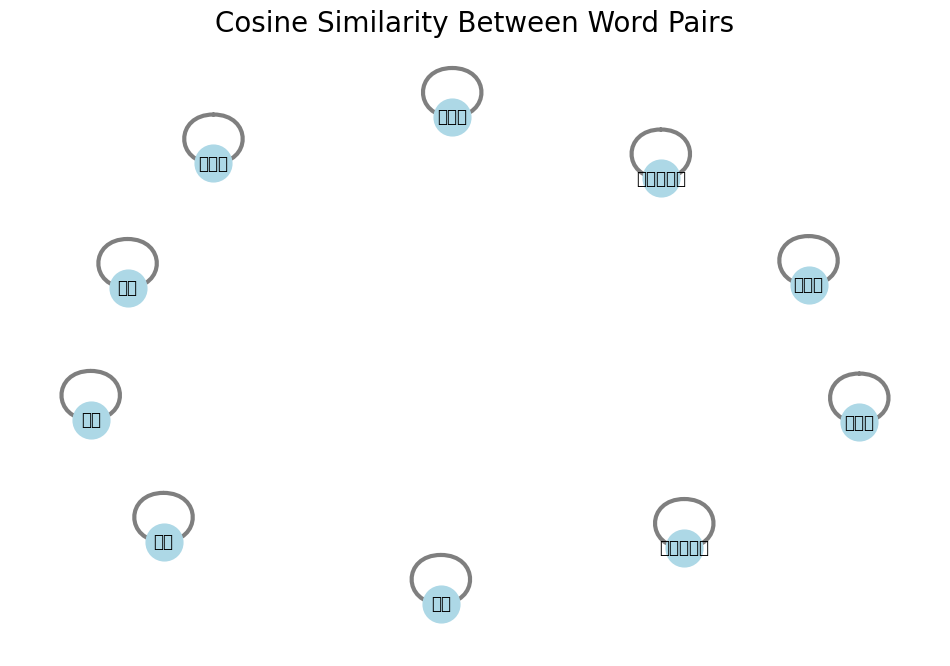

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
from itertools import combinations
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine

# Function to check frequency of word pairs from cleaned sentences
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)  # Create a default dictionary to count pairs

    for sentence in cleaned_sentences:
        words = sentence.split()  # Tokenize the cleaned sentence into words
        word_pairs = combinations(words, 2)  # Create pairs using combinations

        # Count each pair's frequency
        for pair in word_pairs:
            pair_frequency[pair] += 1

    # Return pairs with frequency > 1
    return {pair: frequency for pair, frequency in pair_frequency.items() if frequency > 1}

def generate_word2vec(cleaned_sentences, vector_size=100, window=5, min_count=1):
    # Split the cleaned sentences into lists of words
    tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

    # Initialize and train the Word2Vec model
    model = Word2Vec(sentences=tokenized_sentences, vector_size=vector_size, window=window, min_count=min_count)

    # Retrieve the word vectors (word2vec representation)
    word_vectors = model.wv

    # Save word vectors to a file
    with open('word2vec_human.txt', 'w') as f:
        for word in word_vectors.index_to_key:
            f.write(f"{word}: {word_vectors[word].tolist()}\n")

    print(f"Word2Vec representations have been saved to word2vec_human.txt")
    return word_vectors

def plot_word_similarity_graph(cleaned_sentences):
    # Get word pair frequencies
    pair_frequency = check_pair_frequency(cleaned_sentences)

    # Generate word vectors
    word_vectors = generate_word2vec(cleaned_sentences)

    # Create a new graph
    G = nx.Graph()

    for pair, frequency in pair_frequency.items():
        word1, word2 = pair

        # Check if both words are in the word vectors
        if word1 in word_vectors and word2 in word_vectors:
            # Calculate cosine similarity
            vector1 = word_vectors[word1]
            vector2 = word_vectors[word2]
            similarity = 1 - cosine(vector1, vector2)

            # Only add edge if similarity is greater than a threshold (e.g., 0.5)
            if similarity > 0.5:
                G.add_edge(word1, word2, weight=similarity)

    # Draw the graph
    plt.figure(figsize=(12, 8))

    pos = nx.spring_layout(G)  # Positions for all nodes

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

    # Draw edges with thickness based on weight
    edges = G.edges(data=True)
    nx.draw_networkx_edges(G, pos, width=[3 * edge[2]['weight'] for edge in edges], alpha=0.5)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=12)

    plt.title('Cosine Similarity Between Word Pairs', fontsize=20)
    plt.axis('off')  # Turn off the axis
    plt.show()


# Plot the word similarity graph
plot_word_similarity_graph(cleaned_sentences)


Word2Vec representations have been saved to word2vec_human.txt


<ipython-input-25-4c8a4eae6e4a>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', len(pair_frequency))  # Use a colormap for different colors


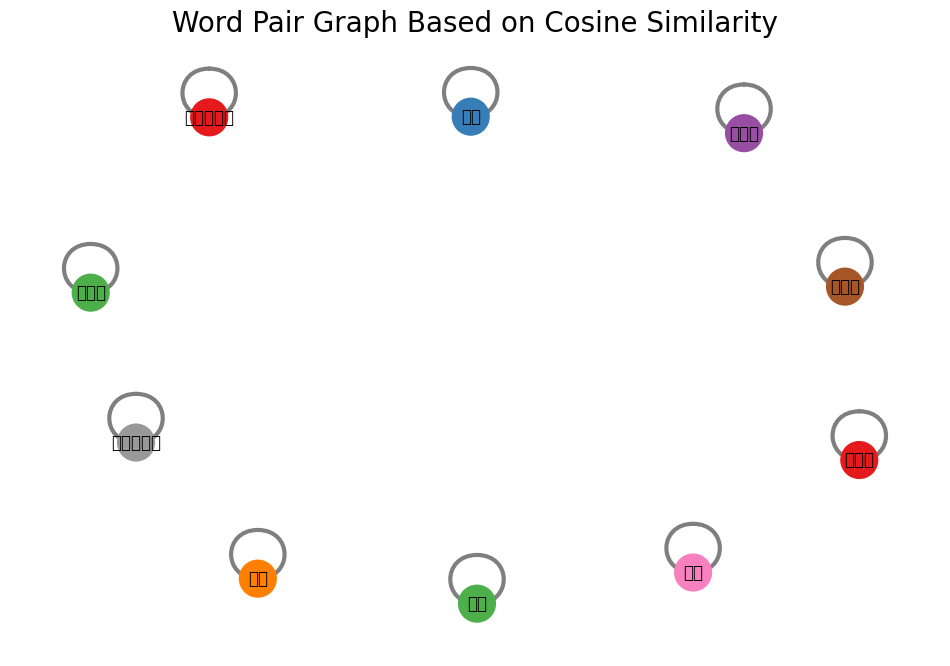

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine

def plot_word_pair_graph_with_colors(cleaned_sentences):
    # Get pair frequencies
    pair_frequency = check_pair_frequency(cleaned_sentences)

    # Generate Word2Vec representations
    word_vectors = generate_word2vec(cleaned_sentences)

    G = nx.Graph()  # Create a new graph

    # Define colors for the words
    colors = plt.cm.get_cmap('Set1', len(pair_frequency))  # Use a colormap for different colors
    color_map = {}

    # Open the file to write cosine similarities
    with open('word_cosine_similarity.txt', 'w') as f:
        f.write("Word Pair, Cosine Similarity\n")  # Header for the file

        for idx, (pair, frequency) in enumerate(pair_frequency.items()):
            word1, word2 = pair

            # Only consider pairs with frequency greater than 1
            if frequency > 1:
                if word1 in word_vectors and word2 in word_vectors:
                    vector1 = word_vectors[word1]
                    vector2 = word_vectors[word2]

                    # Calculate cosine similarity
                    similarity = 1 - cosine(vector1, vector2)

                    # Only add edges for cosine similarity greater than 0.5
                    if similarity > 0.5:
                        G.add_edge(word1, word2, weight=similarity)

                        # Write the word pair and similarity to the file
                        f.write(f"({word1}, {word2}), {similarity:.4f}\n")

                        # Assign different colors for each word
                        if word1 not in color_map:
                            color_map[word1] = colors(idx)  # Assign color for word1
                        if word2 not in color_map:
                            color_map[word2] = colors(idx + 1)  # Assign color for word2

    # Set node colors based on the mapping
    node_colors = [color_map[node] for node in G.nodes()]

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=2)  # Generate positions for the nodes

    # Draw nodes with assigned colors
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color=node_colors)

    # Draw edges with width based on similarity
    edges = G.edges(data=True)
    nx.draw_networkx_edges(G, pos, width=[3 * edge[2]['weight'] for edge in edges], alpha=0.5)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=12)

    plt.title('Word Pair Graph Based on Cosine Similarity', fontsize=20)
    plt.axis('off')  # Turn off the axis
    plt.show()

# Call the function to plot the graph
plot_word_pair_graph_with_colors(cleaned_sentences)



#Make edges between the pair that has same cosine similarity aslo print the word pair in word_to_vec_same_amog _pairs.txt

<ipython-input-26-c98e3b389cbd>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', 10)  # Use a colormap with at least 10 different colors


Word2Vec representations have been saved to word2vec_human.txt


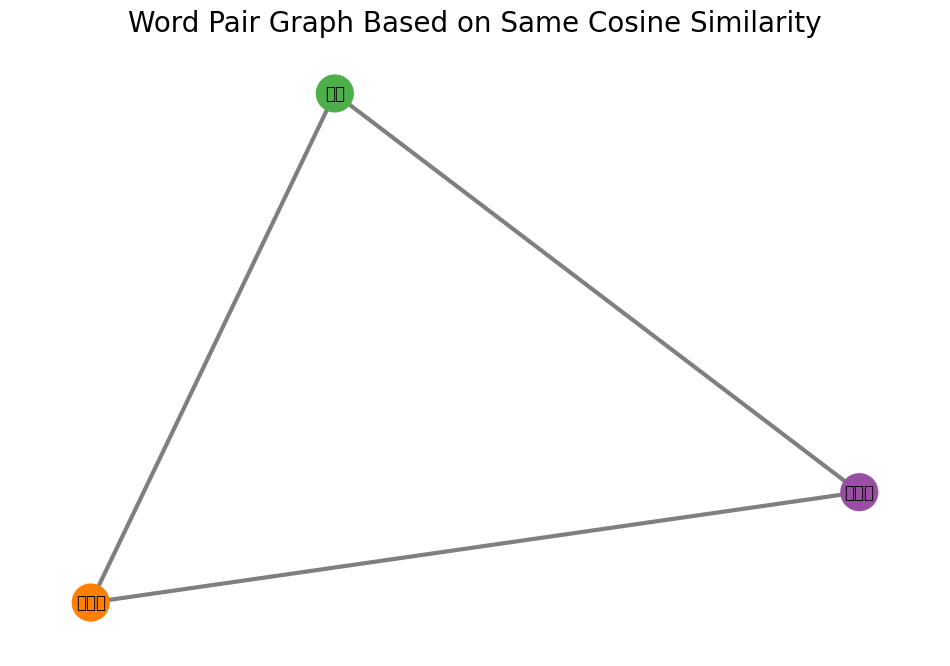

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine

def plot_word_pair_graph_with_same_cosine_similarity(cleaned_sentences):
    # Get pair frequencies
    pair_frequency = check_pair_frequency(cleaned_sentences)

    # Generate Word2Vec representations
    word_vectors = generate_word2vec(cleaned_sentences)

    G = nx.Graph()  # Create a new graph
    similarity_dict = defaultdict(list)  # Store pairs with the same cosine similarity

    # Define a colormap
    colors = plt.cm.get_cmap('Set1', 10)  # Use a colormap with at least 10 different colors

    # Unique color mapping for each word
    color_map = {}

    # Add edges based on frequency and cosine similarity
    for pair, frequency in pair_frequency.items():
        word1, word2 = pair

        # Only consider pairs with frequency greater than 1
        if frequency > 1:
            if word1 in word_vectors and word2 in word_vectors:
                vector1 = word_vectors[word1]
                vector2 = word_vectors[word2]

                # Calculate cosine similarity
                similarity = 1 - cosine(vector1, vector2)

                # Only add to similarity_dict for similarities greater than 0.5
                if similarity > 0.5:
                    similarity_dict[similarity].append((word1, word2))

    # Create edges between pairs that have the same cosine similarity
    for sim, pairs in similarity_dict.items():
        if len(pairs) > 1:  # Only consider if there's more than one pair with the same similarity
            for i in range(len(pairs)):
                for j in range(i + 1, len(pairs)):
                    G.add_edge(pairs[i][0], pairs[j][0], weight=sim)  # Connect the first words of the pairs

    # Write the pairs with same cosine similarity to a text file
    with open('word_to_vec_same_among_pairs.txt', 'w') as f:
        for sim, pairs in similarity_dict.items():
            if len(pairs) > 1:  # Only write if there are multiple pairs
                f.write(f"Similarity: {sim:.2f} - Pairs: {', '.join(['(' + p[0] + ', ' + p[1] + ')' for p in pairs])}\n")

    # Set node colors based on the mapping
    for pair in similarity_dict.values():
        for word in pair:
            if word[0] not in color_map:
                color_map[word[0]] = colors(len(color_map) % 10)  # Cycle through colors
            if word[1] not in color_map:
                color_map[word[1]] = colors(len(color_map) % 10)  # Cycle through colors

    node_colors = [color_map[node] for node in G.nodes()]

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=2)  # Generate positions for the nodes

    # Draw nodes with assigned colors
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color=node_colors)

    # Draw edges with width based on similarity
    edges = G.edges(data=True)
    nx.draw_networkx_edges(G, pos, width=[3 * edge[2]['weight'] for edge in edges], alpha=0.5)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=12)

    plt.title('Word Pair Graph Based on Same Cosine Similarity', fontsize=20)
    plt.axis('off')  # Turn off the axis
    plt.show()

# Call the function to plot the graph
plot_word_pair_graph_with_same_cosine_similarity(cleaned_sentences)


Total number of colors used: 9


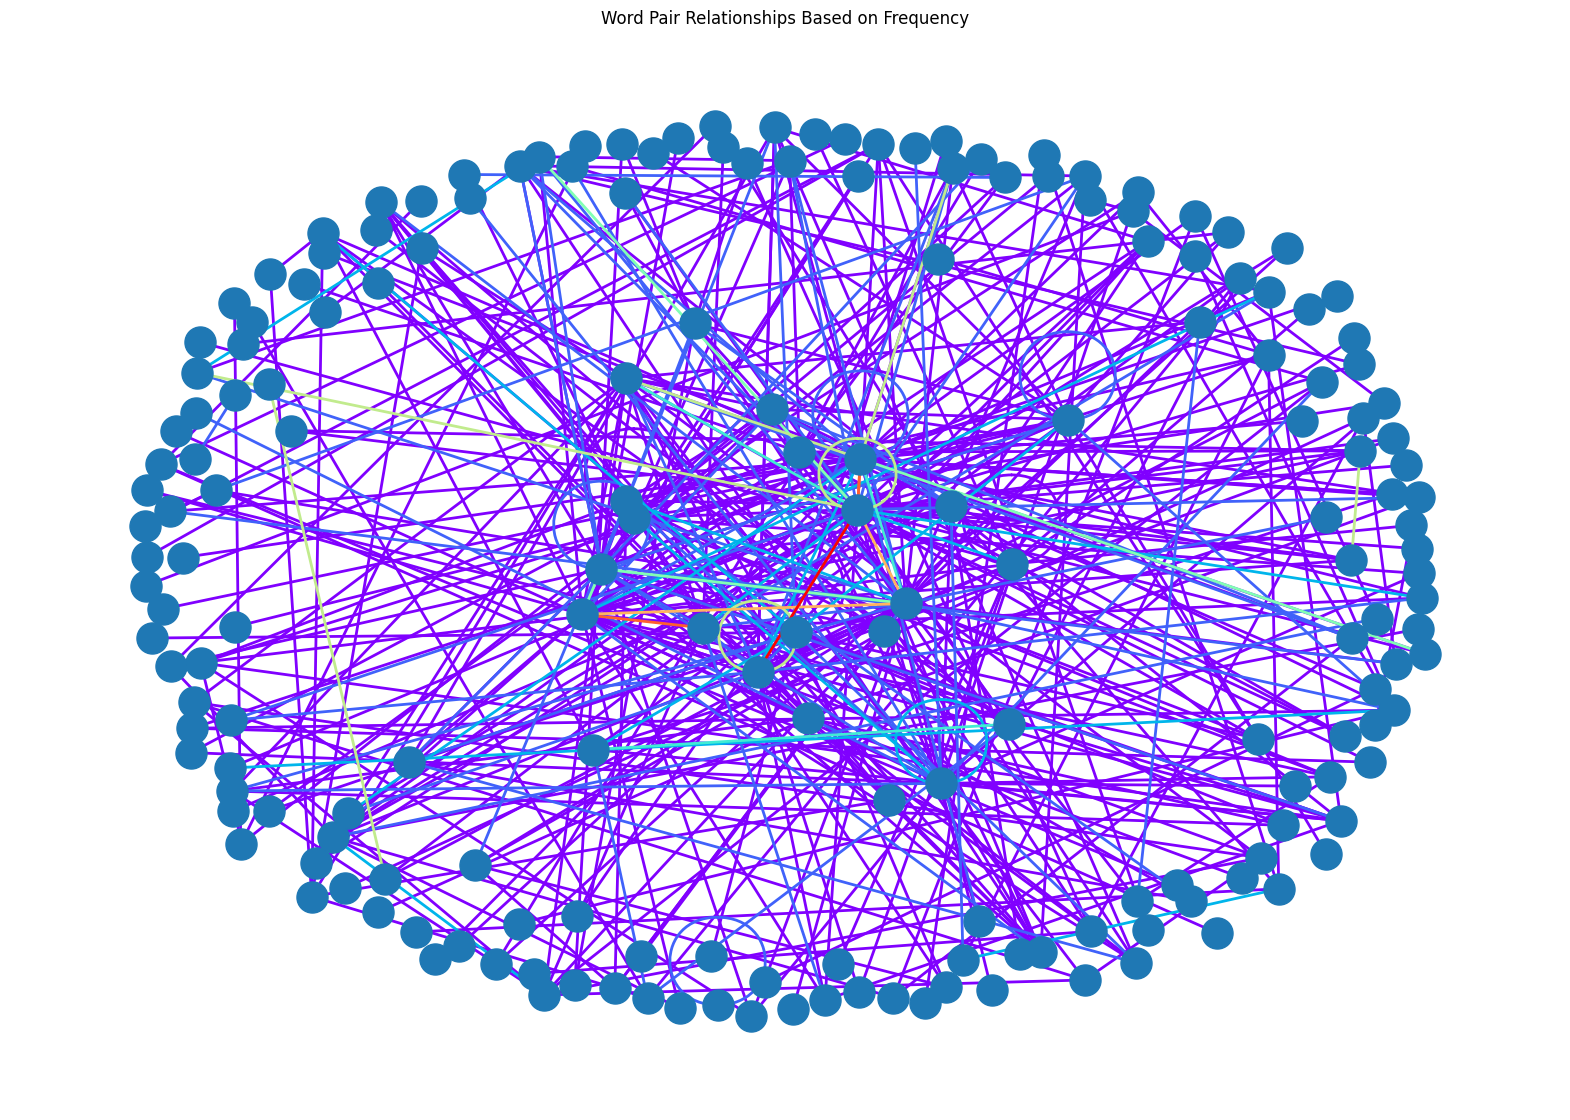

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
import matplotlib.cm as cm
import numpy as np

# Function to check frequency of word pairs from cleaned sentences
def check_pair_frequency(cleaned_sentences):
    pair_frequency = defaultdict(int)  # Create a default dictionary to count pairs

    for sentence in cleaned_sentences:
        words = sentence.split()  # Tokenize the cleaned sentence into words
        word_pairs = combinations(words, 2)  # Create pairs using combinations

        # Count each pair's frequency
        for pair in word_pairs:
            pair_frequency[pair] += 1

    return pair_frequency  # Return the pair frequency dictionary

# Function to plot word pairs with colors based on their frequency
def plot_word_pairs_by_frequency(pair_frequency):
    G = nx.Graph()  # Create a new graph

    # Add edges to the graph based on word pairs and their frequencies
    for pair, frequency in pair_frequency.items():
        if frequency > 1:  # Only consider pairs with frequency greater than 1
            G.add_edge(pair[0], pair[1], weight=frequency)

    # Group edges by frequency
    frequency_groups = defaultdict(list)
    for pair, frequency in pair_frequency.items():
        if frequency > 1:
            frequency_groups[frequency].append(pair)

    # Get the number of distinct frequencies
    num_colors = len(frequency_groups)
    print(f"Total number of colors used: {num_colors}")

    # Generate a colormap with distinct colors for each frequency group
    colors = cm.rainbow(np.linspace(0, 1, num_colors))

    # Generate positions for the nodes using a layout
    pos = nx.spring_layout(G, k=2)  # Increase 'k' for more spacing

    plt.figure(figsize=(20, 14))

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=500)

    # Assign a unique color to each frequency group
    for idx, (frequency, pairs) in enumerate(frequency_groups.items()):
        edges = [(pair[0], pair[1]) for pair in pairs]
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=[colors[idx]] * len(edges), width=2)

    plt.title('Word Pair Relationships Based on Frequency')
    plt.axis('off')  # Turn off the axis
    plt.show()  # Display the graph



pair_frequency = check_pair_frequency(cleaned_sentences)  # Get the frequency of pairs
plot_word_pairs_by_frequency(pair_frequency)  # Plot the word pairs with colors based on frequency
